In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.cluster import KMeans 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, make_scorer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
import streamlit as st



In [2]:
levels = pd.read_csv("estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.csv")
classification = pd.read_csv("Obesity Classification.csv")
dataset = pd.read_csv("ObesityDataSet.csv")

## First Dataset (estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.csv) Data Brief Inspection

In [3]:
levels.head()

,Height,Weight,family_history_with_overweight,SCC,MTRANS_Walking,FAVC_z,FCVC_minmax,NCP_z,CAEC_minmax,CH2O_minmax,FAF_minmax,TUE_z,CALC_z,Age_bin_minmax,NObeyesdad
0,1.62,64.0,1,0,0,2.766876,0.5,0.404704,0.333333,0.5,0.000000,0.550985,1.439033,0.25,1
1,1.52,56.0,1,1,0,2.766876,1.0,0.404704,0.333333,1.0,1.000000,1.092724,0.516552,0.25,1
2,1.80,77.0,1,0,0,2.766876,0.5,0.404704,0.333333,0.5,0.666667,0.550985,2.472136,0.50,1
3,1.80,87.0,0,0,1,2.766876,1.0,0.404704,0.333333,0.5,0.666667,1.092724,2.472136,0.75,2
4,1.78,89.8,0,0,0,2.766876,0.5,2.164116,0.333333,0.5,0.000000,1.092724,0.516552,0.50,3


In [4]:
levels.describe(include="all")

,Height,Weight,family_history_with_overweight,SCC,MTRANS_Walking,FAVC_z,FCVC_minmax,NCP_z,CAEC_minmax,CH2O_minmax,FAF_minmax,TUE_z,CALC_z,Age_bin_minmax,NObeyesdad
count,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000
mean,1.702045,86.622985,0.817354,0.045062,0.026366,0.639326,0.709818,0.763670,0.379834,0.504361,0.337873,0.843202,0.855417,0.499760,3.110259
std,0.093419,26.256245,0.386469,0.207491,0.160260,0.769120,0.267493,0.645761,0.155956,0.306578,0.283687,0.537726,0.518064,0.353723,1.993832
min,1.450000,39.000000,0.000000,0.000000,0.000000,0.361418,0.000000,0.002375,0.000000,0.000000,0.000000,0.000146,0.516552,0.000000,0.000000
25%,1.630000,65.130595,1.000000,0.000000,0.000000,0.361418,0.500000,0.404704,0.333333,0.291005,0.042901,0.466622,0.516552,0.250000,1.000000
50%,1.701383,83.000000,1.000000,0.000000,0.000000,0.361418,0.695087,0.404704,0.333333,0.500000,0.333333,0.813973,0.516552,0.500000,3.000000
75%,1.768770,108.009452,1.000000,0.000000,0.000000,0.361418,1.000000,1.031717,0.333333,0.740243,0.557356,1.092724,1.439033,0.750000,5.000000
max,1.980000,165.057269,1.000000,1.000000,1.000000,2.766876,1.000000,2.164116,1.000000,1.000000,1.000000,2.194694,4.427721,1.000000,6.000000


In [5]:
levels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2086 entries, 0 to 2085
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Height                          2086 non-null   float64
 1   Weight                          2086 non-null   float64
 2   family_history_with_overweight  2086 non-null   int64  
 3   SCC                             2086 non-null   int64  
 4   MTRANS_Walking                  2086 non-null   int64  
 5   FAVC_z                          2086 non-null   float64
 6   FCVC_minmax                     2086 non-null   float64
 7   NCP_z                           2086 non-null   float64
 8   CAEC_minmax                     2086 non-null   float64
 9   CH2O_minmax                     2086 non-null   float64
 10  FAF_minmax                      2086 non-null   float64
 11  TUE_z                           2086 non-null   float64
 12  CALC_z                          20

### Conclusion: the first dataset shows that the data is clean based on the non-existence null entries on each column 

This dataset was taken from UCI library. It has been cleaned using techniques: z-score normalization, one-hot encoding, outlier removal, min-max scaling, and feature selection.

The target column 'NObeyesdad' contains the following encoding of Obesity Levels:

Insufficient_Weight: 0
Normal_Weight:1
Overweight_Level_I: 2
Overweight_Level_II: 3
Obesity_Type_I: 4
Obesity_Type_II: 5
Obesity_Type_III: 6

In [6]:
# Define features (X) and target (y)
X = levels.drop('NObeyesdad', axis=1)
y = levels['NObeyesdad']

In [7]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Create the KNN model (k=3)
knn = KNeighborsClassifier(n_neighbors=3)

In [9]:
# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [10]:
# Predict on the test data
y_pred = knn.predict(X_test)

In [11]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [12]:
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.84
Confusion Matrix:
[[52  2  0  0  0  0  0]
 [12 34 15  4  1  0  0]
 [ 0  2 46  7  1  0  0]
 [ 0  3  2 39  4  0  0]
 [ 0  1  2  6 57  5  0]
 [ 0  0  0  0  0 67  0]
 [ 0  0  0  0  0  0 56]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.96      0.88        54
           1       0.81      0.52      0.63        66
           2       0.71      0.82      0.76        56
           3       0.70      0.81      0.75        48
           4       0.90      0.80      0.85        71
           5       0.93      1.00      0.96        67
           6       1.00      1.00      1.00        56

    accuracy                           0.84       418
   macro avg       0.84      0.84      0.83       418
weighted avg       0.84      0.84      0.83       418



In [13]:
pipeline_knn = Pipeline(steps=[("scaler", MinMaxScaler()), ("knn", KNeighborsClassifier())]) 
pipeline_log = Pipeline([("scaler", MinMaxScaler()), ("lr", LogisticRegression())])
pipeline_tree = Pipeline([("scaler", MinMaxScaler()), ("dt", DecisionTreeClassifier())])

In [14]:
pipeline_knn.fit(X_train, y_train)
pipeline_log.fit(X_train, y_train) 
pipeline_tree.fit(X_train, y_train)

c:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('scaler', MinMaxScaler()), ('dt', DecisionTreeClassifier())])

In [15]:
knn_y_pred = pipeline_knn.predict(X_test) 
log_y_pred = pipeline_log.predict(X_test) 
tree_y_pred = pipeline_tree.predict(X_test)

In [16]:
print(classification_report(y_test, knn_y_pred))
print(classification_report(y_test, log_y_pred)) 
print(classification_report(y_test, tree_y_pred))

              precision    recall  f1-score   support

           0       0.66      0.83      0.74        54
           1       0.68      0.48      0.57        66
           2       0.69      0.73      0.71        56
           3       0.60      0.60      0.60        48
           4       0.85      0.80      0.83        71
           5       0.96      0.99      0.97        67
           6       0.93      1.00      0.97        56

    accuracy                           0.78       418
   macro avg       0.77      0.78      0.77       418
weighted avg       0.78      0.78      0.77       418

              precision    recall  f1-score   support

           0       0.72      0.89      0.79        54
           1       0.71      0.38      0.50        66
           2       0.67      0.70      0.68        56
           3       0.55      0.50      0.52        48
           4       0.66      0.75      0.70        71
           5       0.82      0.84      0.83        67
           6       0.85 

In [18]:
f1 = make_scorer(f1_score , average='macro')

log_params = {"lr__C":[0.1, 1,10, 100], "lr__penalty":["l1","l2"]}
knn_params = {"knn__n_neighbors":[10, 20,30]}
tree_params = {"dt__max_features":[0.2, 0.5, 0.7], "dt__min_samples_leaf":[1, 2, 3, 5, 10], "dt__max_depth":[5, 10, 15]}

In [19]:
#Le scoring par defaut est accuracy
log_grid = GridSearchCV(pipeline_log, log_params, cv=5, verbose=True, refit=True, n_jobs=-1,scoring=f1)
log_grid.fit(X_train, y_train)

knn_grid = GridSearchCV(pipeline_knn, knn_params, cv=5, verbose=True, refit=True, n_jobs=-1,scoring=f1)
knn_grid.fit(X_train, y_train)

tree_grid = GridSearchCV(pipeline_tree, tree_params, cv=5, verbose=True, refit=True, n_jobs=-1,scoring=f1)
tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


c:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\hp\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
 

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('dt', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'dt__max_depth': [5, 10, 15],
                         'dt__max_features': [0.2, 0.5, 0.7],
                         'dt__min_samples_leaf': [1, 2, 3, 5, 10]},
             scoring=make_scorer(f1_score, average=macro), verbose=True)

In [20]:
log_grid.best_score_

0.8948728433066124

In [21]:
knn_grid.best_score_

0.7013049711156782

In [22]:
tree_grid.best_score_

0.9051622651650032

## Best Model with the best set of parameters obtained from the Grid Search

In [23]:
best_model = log_grid.best_estimator_  

y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        54
           1       0.96      0.80      0.88        66
           2       0.82      0.84      0.83        56
           3       0.80      0.77      0.79        48
           4       0.93      0.93      0.93        71
           5       0.99      1.00      0.99        67
           6       0.90      1.00      0.95        56

    accuracy                           0.91       418
   macro avg       0.90      0.91      0.90       418
weighted avg       0.91      0.91      0.91       418



In [24]:
best_model = knn_grid.best_estimator_  

y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.81      0.72        54
           1       0.66      0.35      0.46        66
           2       0.60      0.71      0.65        56
           3       0.67      0.65      0.66        48
           4       0.84      0.80      0.82        71
           5       0.92      0.99      0.95        67
           6       0.92      1.00      0.96        56

    accuracy                           0.76       418
   macro avg       0.75      0.76      0.74       418
weighted avg       0.76      0.76      0.75       418



In [25]:
best_model = tree_grid.best_estimator_  

y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        54
           1       0.88      0.79      0.83        66
           2       0.81      0.86      0.83        56
           3       0.77      0.83      0.80        48
           4       0.94      0.89      0.91        71
           5       0.96      1.00      0.98        67
           6       1.00      0.98      0.99        56

    accuracy                           0.90       418
   macro avg       0.90      0.90      0.90       418
weighted avg       0.90      0.90      0.90       418



## Multi-class optimization

### one vs one classifier

In [28]:
#Logistic Regression Classifier
ovo_log = OneVsOneClassifier(pipeline_log)
ovo_log.fit(X_train, y_train)
y_pred_lr = ovo_log.predict(X_test)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92        54
           1       0.90      0.70      0.79        66
           2       0.80      0.80      0.80        56
           3       0.72      0.75      0.73        48
           4       0.86      0.87      0.87        71
           5       0.96      0.97      0.96        67
           6       0.93      1.00      0.97        56

    accuracy                           0.87       418
   macro avg       0.86      0.87      0.86       418
weighted avg       0.87      0.87      0.87       418



In [29]:
#KNNClassifier
ovo_knn = OneVsOneClassifier(pipeline_knn)
ovo_knn.fit(X_train, y_train)
y_pred_knn = ovo_knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82        54
           1       0.73      0.48      0.58        66
           2       0.70      0.82      0.75        56
           3       0.77      0.75      0.76        48
           4       0.88      0.89      0.88        71
           5       0.99      1.00      0.99        67
           6       0.97      1.00      0.98        56

    accuracy                           0.83       418
   macro avg       0.83      0.83      0.82       418
weighted avg       0.83      0.83      0.83       418



In [30]:
#DecisionTreeClassifier(ran)
ovo_tree = OneVsOneClassifier(pipeline_tree)
ovo_tree.fit(X_train, y_train)
y_pred_dt = ovo_tree.predict(X_test)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        54
           1       0.95      0.80      0.87        66
           2       0.81      0.86      0.83        56
           3       0.81      0.90      0.85        48
           4       0.93      0.96      0.94        71
           5       0.97      0.99      0.98        67
           6       1.00      1.00      1.00        56

    accuracy                           0.92       418
   macro avg       0.92      0.92      0.92       418
weighted avg       0.92      0.92      0.92       418



### One vs Rest Classifier

In [32]:
#Logistic Regression Classifier
ovr_log = OneVsRestClassifier(pipeline_log)
ovr_log.fit(X_train, y_train)
y_pred_lr = ovr_log.predict(X_test)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.68      0.83      0.75        54
           1       0.65      0.30      0.41        66
           2       0.63      0.61      0.62        56
           3       0.52      0.46      0.49        48
           4       0.57      0.66      0.61        71
           5       0.78      0.87      0.82        67
           6       0.81      1.00      0.90        56

    accuracy                           0.67       418
   macro avg       0.66      0.68      0.66       418
weighted avg       0.67      0.67      0.66       418



In [34]:
#KNNClassifier
ovr_knn = OneVsRestClassifier(pipeline_knn)
ovr_knn.fit(X_train, y_train)
y_pred_knn = ovr_knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.73      0.83      0.78        54
           1       0.74      0.44      0.55        66
           2       0.71      0.75      0.73        56
           3       0.67      0.75      0.71        48
           4       0.80      0.85      0.82        71
           5       0.96      0.99      0.97        67
           6       0.93      1.00      0.97        56

    accuracy                           0.80       418
   macro avg       0.79      0.80      0.79       418
weighted avg       0.80      0.80      0.79       418



In [35]:
#DecisionTreeClassifier
ovr_tree = OneVsRestClassifier(pipeline_tree)
ovr_tree.fit(X_train, y_train)
y_pred_dt = ovr_tree.predict(X_test)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        54
           1       0.88      0.77      0.82        66
           2       0.88      0.75      0.81        56
           3       0.89      0.83      0.86        48
           4       0.98      0.89      0.93        71
           5       0.99      1.00      0.99        67
           6       0.64      1.00      0.78        56

    accuracy                           0.88       418
   macro avg       0.89      0.88      0.88       418
weighted avg       0.90      0.88      0.88       418



## GridSearch over OvO without Pipeline

In [37]:
f1 = make_scorer(f1_score , average='macro')

log_params = {"estimator__C":[0.1, 1,10, 100], "estimator__penalty":["l1","l2"]}

knn_params = {"estimator__n_neighbors":[10, 20,30]}

tree_params = {"estimator__max_features":[0.2, 0.5, 0.7], "estimator__min_samples_leaf":[1, 2, 3, 5, 10], "estimator__max_depth":[5, 10, 15]}

In [38]:
scaler = MinMaxScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [39]:
ovr_log = OneVsOneClassifier(LogisticRegression())
ovr_knn = OneVsOneClassifier(KNeighborsClassifier())
ovr_tree = OneVsOneClassifier(DecisionTreeClassifier())

In [40]:
log_grid = GridSearchCV(ovr_log, log_params, cv=5, verbose=True, refit=True, n_jobs=1, scoring=f1)
log_grid.fit(X_train_sc, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


c:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5, estimator=OneVsOneClassifier(estimator=LogisticRegression()),
             n_jobs=1,
             param_grid={'estimator__C': [0.1, 1, 10, 100],
                         'estimator__penalty': ['l1', 'l2']},
             scoring=make_scorer(f1_score, average=macro), verbose=True)

In [44]:
best_model = log_grid.best_estimator_  

y_pred = best_model.predict(X_test_sc)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        54
           1       0.97      0.88      0.92        66
           2       0.91      0.93      0.92        56
           3       0.94      0.92      0.93        48
           4       0.97      0.99      0.98        71
           5       0.99      1.00      0.99        67
           6       1.00      1.00      1.00        56

    accuracy                           0.96       418
   macro avg       0.96      0.96      0.96       418
weighted avg       0.96      0.96      0.96       418



In [42]:
knn_grid = GridSearchCV(ovr_knn, knn_params, cv=5, verbose=True, refit=True, n_jobs=1,scoring=f1)
knn_grid.fit(X_train_sc, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5,
             estimator=OneVsOneClassifier(estimator=KNeighborsClassifier()),
             n_jobs=1, param_grid={'estimator__n_neighbors': [10, 20, 30]},
             scoring=make_scorer(f1_score, average=macro), verbose=True)

In [45]:
best_model = knn_grid.best_estimator_  

y_pred = best_model.predict(X_test_sc)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.81      0.68        54
           1       0.63      0.29      0.40        66
           2       0.60      0.66      0.63        56
           3       0.67      0.65      0.66        48
           4       0.81      0.79      0.80        71
           5       0.90      0.99      0.94        67
           6       0.90      1.00      0.95        56

    accuracy                           0.74       418
   macro avg       0.73      0.74      0.72       418
weighted avg       0.74      0.74      0.72       418



In [43]:
tree_grid = GridSearchCV(ovr_tree, tree_params, cv=5, verbose=True, refit=True, n_jobs=-1,scoring=f1)
tree_grid.fit(X_train_sc, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=5,
             estimator=OneVsOneClassifier(estimator=DecisionTreeClassifier()),
             n_jobs=-1,
             param_grid={'estimator__max_depth': [5, 10, 15],
                         'estimator__max_features': [0.2, 0.5, 0.7],
                         'estimator__min_samples_leaf': [1, 2, 3, 5, 10]},
             scoring=make_scorer(f1_score, average=macro), verbose=True)

In [46]:
best_model = tree_grid.best_estimator_  

y_pred = best_model.predict(X_test_sc)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93        54
           1       0.89      0.86      0.88        66
           2       0.82      0.80      0.81        56
           3       0.79      0.88      0.83        48
           4       0.97      0.96      0.96        71
           5       0.99      0.99      0.99        67
           6       1.00      1.00      1.00        56

    accuracy                           0.92       418
   macro avg       0.91      0.92      0.91       418
weighted avg       0.92      0.92      0.92       418



##  Explainable AI

c:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:ylabel='Feature'>

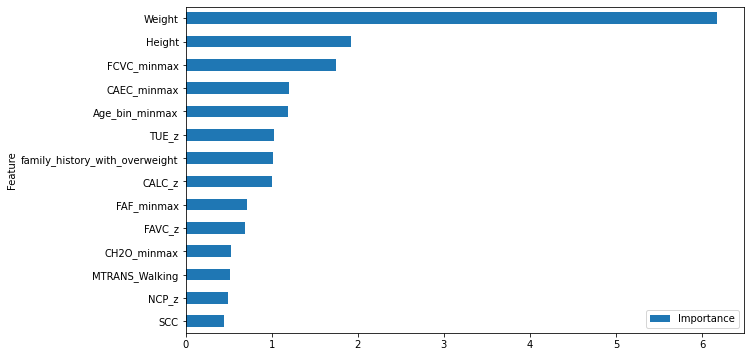

In [47]:
log = LogisticRegression()

log.fit(X_train_sc, y_train)

coefficients = log.coef_

avg_importance = np.mean(np.abs(coefficients), axis=0)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': avg_importance})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [48]:
!pip install eli5

In [49]:
import eli5

In [51]:
eli5.explain_weights(log, feature_names=list(X.columns))

Explanation(estimator='LogisticRegression()', description="\nFeatures with largest coefficients per class.\nCaveats:\n1. Be careful with features which are not\n   independent - weights don't show their importance.\n2. If scale of input features is different then scale of coefficients\n   will also be different, making direct comparison between coefficient values\n   incorrect.\n3. Depending on regularization, rare features sometimes may have high\n   coefficients; this doesn't mean they contribute much to the\n   classification result for most examples.\n", error=None, method='linear model', is_regression=False, targets=[TargetExplanation(target=0, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=2.926664123045974, std=None, value=None), FeatureWeight(feature='Height', weight=2.821742716247879, std=None, value=None), FeatureWeight(feature='CAEC_minmax', weight=1.730957398711553, std=None, value=None), FeatureWeight(feature='FAF_minmax', weight=0.7954035048061785, std=None, value=None), FeatureWeight(feature='TUE_z', weight=0.576247234037106, std=None, value=None), FeatureWeight(feature='NCP_z', weight=0.4263979300961676, std=None, value=None), FeatureWeight(feature='FAVC_z', weight=0.20457991356509075, std=None, value=None), FeatureWeight(feature='CH2O_minmax', weight=0.1607429616424369, std=None, value=None), FeatureWeight(feature='CALC_z', weight=0.13871193834015427, std=None, value=None), FeatureWeight(feature='FCVC_minmax', weight=0.11561528147032828, std=None, value=None)], neg=[FeatureWeight(feature='Weight', weight=-11.9848074456358, std=None, value=None), FeatureWeight(feature='Age_bin_minmax', weight=-1.9807149538355306, std=None, value=None), FeatureWeight(feature='family_history_with_overweight', weight=-1.4509632192525908, std=None, value=None), FeatureWeight(feature='MTRANS_Walking', weight=-0.5234604024219014, std=None, value=None), FeatureWeight(feature='SCC', weight=-0.16950212074582952, std=None, value=None)], pos_remaining=0, neg_remaining=0), proba=None, score=None, weighted_spans=None, heatmap=None), TargetExplanation(target=1, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=2.730691814420387, std=None, value=None), FeatureWeight(feature='CAEC_minmax', weight=2.462180652048519, std=None, value=None), FeatureWeight(feature='MTRANS_Walking', weight=1.2138044995410848, std=None, value=None), FeatureWeight(feature='FAF_minmax', weight=0.9475768668901954, std=None, value=None), FeatureWeight(feature='TUE_z', weight=0.7498336365376552, std=None, value=None), FeatureWeight(feature='Height', weight=0.7404099178991236, std=None, value=None), FeatureWeight(feature='FAVC_z', weight=0.568728118791347, std=None, value=None), FeatureWeight(feature='CALC_z', weight=0.2874427948351513, std=None, value=None), FeatureWeight(feature='SCC', weight=0.20420646253817643, std=None, value=None), FeatureWeight(feature='NCP_z', weight=0.03212761280850037, std=None, value=None)], neg=[FeatureWeight(feature='Weight', weight=-5.389762479654995, std=None, value=None), FeatureWeight(feature='family_history_with_overweight', weight=-1.3488531785863445, std=None, value=None), FeatureWeight(feature='Age_bin_minmax', weight=-1.1112716518410943, std=None, value=None), FeatureWeight(feature='FCVC_minmax', weight=-0.8233840363861906, std=None, value=None), FeatureWeight(feature='CH2O_minmax', weight=-0.330660721304622, std=None, value=None)], pos_remaining=0, neg_remaining=0), proba=None, score=None, weighted_spans=None, heatmap=None), TargetExplanation(target=2, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=3.478210485767985, std=None, value=None), FeatureWeight(feature='SCC', weight=1.3554459502486138, std=None, value=None), FeatureWeight(feature='NCP_z', weight=0.6523845362048188, std=None, value=None), FeatureWeight(feature='TUE_z', weight=0.642032452146355, std=None, value=None), FeatureWeight(feature='MTRANS_Walking', weight=0.5807432592608075, std=None, val

In [52]:
!pip install shap

In [53]:
import shap 

explainer = shap.Explainer(log.predict, X_test_sc)

In [54]:
shap_values = explainer(X_test_sc)

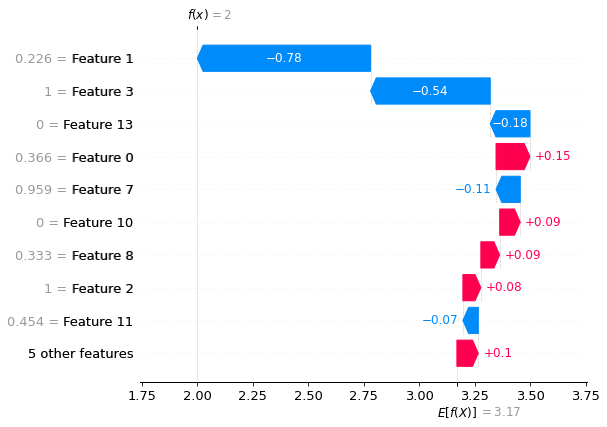

In [55]:
shap.plots.waterfall(shap_values[0])

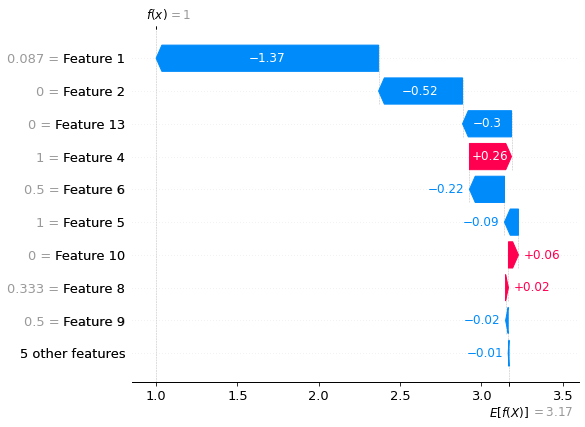

In [56]:
shap.plots.waterfall(shap_values[2])

In [ ]:
st.header("Welcome to Janice Data Science Project Webpage!")

## Second Dataset (Obesity Classification.csv) Data Brief Inspection

In [4]:
classification.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [16]:
classification.describe(include="all")

,ID,Age,Gender,Height,Weight,BMI,Label
count,108.000000,108.000000,108,108.000000,108.000000,108.000000,108
unique,NaN,NaN,2,NaN,NaN,NaN,4
top,NaN,NaN,Male,NaN,NaN,NaN,Underweight
freq,NaN,NaN,56,NaN,NaN,NaN,47
mean,56.046296,46.555556,NaN,166.574074,59.490741,20.549074,NaN
std,31.917939,24.720620,NaN,27.873615,28.856233,7.583818,NaN
min,1.000000,11.000000,NaN,120.000000,10.000000,3.900000,NaN
25%,28.750000,27.000000,NaN,140.000000,35.000000,16.700000,NaN
50%,56.500000,42.500000,NaN,175.000000,55.000000,21.200000,NaN
75%,83.250000,59.250000,NaN,190.000000,85.000000,26.100000,NaN


In [9]:
classification.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB


### Conclusion: the second dataset shows that the data is clean based on the non-existence null entries on each column 

## Third Dataset (ObesityDataSet.csv) Data Brief Inspection

In [5]:
dataset.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [15]:
dataset.describe(include="all")

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,2111,2111.000000,2111.000000,2111.000000,2111,2111,2111.000000,2111.000000,2111,2111,2111.000000,2111,2111.000000,2111.000000,2111,2111,2111
unique,2,NaN,NaN,NaN,2,2,NaN,NaN,4,2,NaN,2,NaN,NaN,4,5,7
top,Male,NaN,NaN,NaN,yes,yes,NaN,NaN,Sometimes,no,NaN,no,NaN,NaN,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,NaN,NaN,NaN,1726,1866,NaN,NaN,1765,2067,NaN,2015,NaN,NaN,1401,1580,351
mean,NaN,24.312600,1.701677,86.586058,NaN,NaN,2.419043,2.685628,NaN,NaN,2.008011,NaN,1.010298,0.657866,NaN,NaN,NaN
std,NaN,6.345968,0.093305,26.191172,NaN,NaN,0.533927,0.778039,NaN,NaN,0.612953,NaN,0.850592,0.608927,NaN,NaN,NaN
min,NaN,14.000000,1.450000,39.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,19.947192,1.630000,65.473343,NaN,NaN,2.000000,2.658738,NaN,NaN,1.584812,NaN,0.124505,0.000000,NaN,NaN,NaN
50%,NaN,22.777890,1.700499,83.000000,NaN,NaN,2.385502,3.000000,NaN,NaN,2.000000,NaN,1.000000,0.625350,NaN,NaN,NaN
75%,NaN,26.000000,1.768464,107.430682,NaN,NaN,3.000000,3.000000,NaN,NaN,2.477420,NaN,1.666678,1.000000,NaN,NaN,NaN


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

### Conclusion: the third dataset shows that the data is clean based on the non-existence null entries on each column 

The attributes related with eating habits are: Frequent consumption of high caloric food (FAVC), Frequency of consumption of vegetables (FCVC), Number of main meals (NCP), Consumption of food between meals (CAEC), Consumption of water daily (CH20), and Consumption of alcohol (CALC). The attributes related with the physical condition are: Calories consumption monitoring (SCC), Physical activity frequency (FAF), Time using technology devices (TUE), Transportation used (MTRANS)
variables obtained :
Gender, Age, Height and Weight.

NObesity values are:

•Underweight Less than 18.5
•Normal 18.5 to 24.9
•Overweight 25.0 to 29.9
•Obesity I 30.0 to 34.9
•Obesity II 35.0 to 39.9
•Obesity III Higher than 40

